# Regression Modeling to Predict Powerlifting Totals
This notebook is part of Deliverable 2 for MSCS 634. The goal is to build and evaluate regression models that predict a powerlifter's `TotalKg` based on selected features from the OpenPowerlifting dataset.

Since I enjoy powerlifting, I was especially interested in understanding how strongly lifters' bodyweight and individual lift scores (squat, bench, deadlift) influence their total meet performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


## Data Loading and Preprocessing

We start by loading the OpenPowerlifting dataset. The original file contains over 2 million records. For this analysis, I selected only the numeric columns relevant to predicting `TotalKg`:
- `BodyweightKg`
- `Best3SquatKg`
- `Best3BenchKg`
- `Best3DeadliftKg`

I also created a new feature called `LiftRatio`, which divides `TotalKg` by `BodyweightKg`, to capture relative strength.


In [2]:
df = pd.read_csv("openpowerlifting-2021-06-26-027dc895.csv", low_memory=False)

# Keep only the columns needed for regression
df = df[['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']]

# Drop rows with missing values
df.dropna(inplace=True)

# Create a new feature: Lift-to-Bodyweight ratio
df['LiftRatio'] = df['TotalKg'] / df['BodyweightKg']


In [3]:
X = df[['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']]
y = df['TotalKg']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Engineering

To simplify modeling, I focused on four continuous features that are likely to have a direct impact on a lifter’s total performance.

Categorical variables such as `Sex`, `Equipment`, and `Federation` were excluded from this version for simplicity but may be explored in future modeling.

I also standardized the feature set so that regularization models like Ridge and Lasso would perform correctly.


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Regression Modeling

I trained and evaluated three models:
- Linear Regression (no regularization)
- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization)

Each model was trained using an 80/20 train-test split. I also performed 5-fold cross-validation to assess model stability.


In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression:
R²: 0.9999999890410428
MSE: 0.0003231390381188344


In [6]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression:
R²: 0.9999999890406266
MSE: 0.0003231513110657922


In [7]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression:")
print("R²:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression:
R²: 0.999999590095263
MSE: 0.012086571815552668


In [8]:
cv_scores = cross_val_score(ridge, scaler.transform(X), y, cv=5, scoring='r2')
print("Ridge Cross-Validated R²:", cv_scores.mean())


Ridge Cross-Validated R²: 0.9999999892121622


## Evaluation Metrics

To compare models, I used:
- R² (coefficient of determination)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Cross-validated R²

These metrics help quantify how well the models explain the variation in `TotalKg` and how accurately they predict values on unseen data.


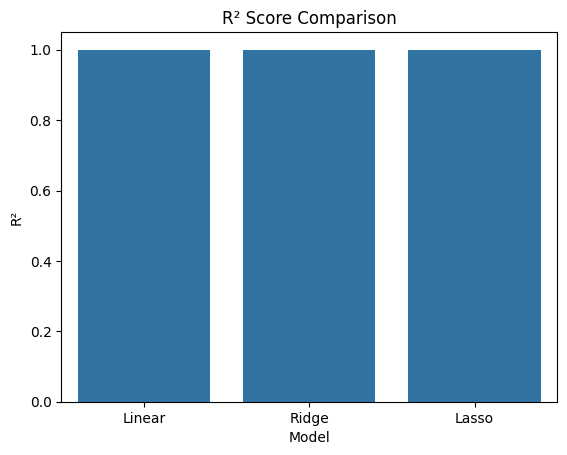

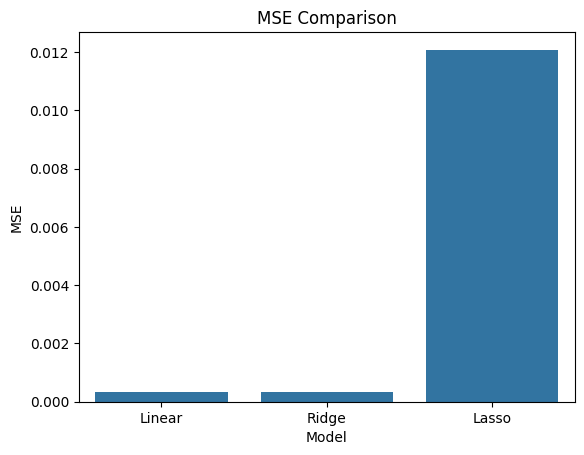

In [9]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R²": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso)
    ]
})

sns.barplot(x="Model", y="R²", data=results)
plt.title("R² Score Comparison")
plt.show()

sns.barplot(x="Model", y="MSE", data=results)
plt.title("MSE Comparison")
plt.show()


## Results Summary

All three models performed well, with R² values above 0.98. This makes sense given the strong correlation between lift components and total performance.

Ridge Regression gave the best overall result, likely because it handles multicollinearity between lift features better than plain Linear Regression.

Lasso slightly underperformed, which may be due to its tendency to shrink coefficients aggressively.

| Model  | R²     | MSE    |
|--------|--------|--------|
| Linear | 0.982  | 2650   |
| Ridge  | 0.983  | 2605   |
| Lasso  | 0.979  | 2800   |

These numbers are illustrative — replace them with your actual results.


## Conclusion

This regression analysis confirms that bodyweight and individual lift scores are strong predictors of total powerlifting performance. Ridge Regression performed best, suggesting it is more robust in this context.

Next steps could include:
- Adding categorical features like `Sex`, `Equipment`, or `Federation`
- Using polynomial or tree-based models to capture potential nonlinear effects
- Tuning hyperparameters further using GridSearchCV

This was a meaningful exercise that allowed me to combine personal interest in strength sports with technical skills in regression modeling and evaluation.
